# Step 01: Importing Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 02: Reading Data from CSV & Exploring Data

- Checking the dsuccessful data retrieval by print first five rows.
- Getting information about each column, its type, data present by .info() function.

In [27]:
df = pd.read_csv('/content/Food data.csv')
# Preview the first few rows
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


In [28]:
# Get info about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


Step 03: Data Cleaning
- Checking for Unique Values to Handle Missing Data
- Fixing Inconsistent Categorical Values
- Assigning Correcr Data Types

In [29]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")
    print("--------------------")


Column: ID
Unique values (1822): [0 1 2 3 4 5 6 7 8 9]...
--------------------

Column: date
Unique values (867): ['12/19/2022' '11/21/2023' '2/1/2022' '3/19/2023' '7/18/2022' '3/2/2023'
 '4/18/2022' '12/16/2023' '7/7/2023' '11/7/2023']...
--------------------

Column: meals_served
Unique values (374): [196. 244. 148. 157. 297. 241. 443. 416. 439. 267.]...
--------------------

Column: kitchen_staff
Unique values (18): ['13' '15' '16' '19' '10' '18' '7' '5' '12' '8']...
--------------------

Column: temperature_C
Unique values (892): [27.88727268 10.31787225 27.71430012 19.17390198 26.37523347 16.86350635
 19.8886271  18.5595909  24.11102727 25.41249317]...
--------------------

Column: humidity_percent
Unique values (868): [45.36285391 64.43047525 69.04611285 46.29282284 79.74106395 79.2859195
 77.32813583 75.78650182 43.39580313 89.40518256]...
--------------------

Column: day_of_week
Unique values (7): [0 1 6 3 5 4 2]
--------------------

Column: special_event
Unique values (3): 

In [30]:
# Fix Inconsistent Categorical Values
# Fix date
df['date'] = pd.to_datetime(df['date'])

# Fix kitchen_staff
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')

# Fix special_event
df['special_event'] = df['special_event'].str.strip().str.lower().map({
    '0': 0, '1': 1, 'one': 1
})
df['special_event'].fillna(0, inplace=True)  # default to 0 if unrecognized
df['special_event'] = df['special_event'].astype(int)

# Fix staff_experience
# Normalize to lowercase, strip whitespace
df['staff_experience'] = df['staff_experience'].str.strip().str.lower()

# Map to consistent categories
df['staff_experience'] = df['staff_experience'].replace({
    'beginner': 'Beginner',
    'intermediate': 'Intermediate',
    'expert': 'Expert',
    'expert ': 'Expert',
    'Pro': 'Pro'
})

# Fill missing
df['staff_experience'].fillna(df['staff_experience'].mode()[0], inplace=True)

#Fix waste_category
# Normalize casing
df['waste_category'] = df['waste_category'].str.strip().str.lower().str.capitalize()

# Fill missing
df['waste_category'].fillna(df['waste_category'].mode()[0], inplace=True)


<ipython-input-30-8002ad840a6d>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['special_event'].fillna(0, inplace=True)  # default to 0 if unrecognized
<ipython-input-30-8002ad840a6d>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [31]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals[:10]}{'...' if len(unique_vals) > 10 else ''}")
    print("--------------------")


Column: ID
Unique values (1822): [0 1 2 3 4 5 6 7 8 9]...
--------------------

Column: date
Unique values (867): <DatetimeArray>
['2022-12-19 00:00:00', '2023-11-21 00:00:00', '2022-02-01 00:00:00',
 '2023-03-19 00:00:00', '2022-07-18 00:00:00', '2023-03-02 00:00:00',
 '2022-04-18 00:00:00', '2023-12-16 00:00:00', '2023-07-07 00:00:00',
 '2023-11-07 00:00:00']
Length: 10, dtype: datetime64[ns]...
--------------------

Column: meals_served
Unique values (374): [196. 244. 148. 157. 297. 241. 443. 416. 439. 267.]...
--------------------

Column: kitchen_staff
Unique values (16): [13. 15. 16. 19. 10. 18.  7.  5. 12.  8.]...
--------------------

Column: temperature_C
Unique values (892): [27.88727268 10.31787225 27.71430012 19.17390198 26.37523347 16.86350635
 19.8886271  18.5595909  24.11102727 25.41249317]...
--------------------

Column: humidity_percent
Unique values (868): [45.36285391 64.43047525 69.04611285 46.29282284 79.74106395 79.2859195
 77.32813583 75.78650182 43.39580313 89

# Step 04: Summary Statistics

- Summarize Stats
- Visualize Distributions
- Find Correlation

In [32]:
missing_value = df.isnull().sum()
missing_percentage = (missing_value/len(df)) * 100
print(missing_percentage)

ID                  0.000000
date                0.000000
meals_served        1.756312
kitchen_staff       1.317234
temperature_C       0.000000
humidity_percent    0.878156
day_of_week         0.000000
special_event       0.000000
past_waste_kg       0.878156
staff_experience    0.000000
waste_category      0.000000
dtype: float64


In [24]:
# Confirm no missing values
print(df.isnull().sum())

# Confirm datatypes
print(df.dtypes)

# Confirm unique values in categoricals are clean
print(df['special_event'].unique())
print(df['staff_experience'].unique())
print(df['waste_category'].unique())

ID                   0
date                 0
meals_served        32
kitchen_staff       24
temperature_C        0
humidity_percent    16
day_of_week          0
special_event        0
past_waste_kg       16
staff_experience     0
waste_category       0
dtype: int64
ID                           int64
date                datetime64[ns]
meals_served               float64
kitchen_staff              float64
temperature_C              float64
humidity_percent           float64
day_of_week                  int64
special_event                int64
past_waste_kg              float64
staff_experience            object
waste_category              object
dtype: object
[0 1]
['Intermediate' 'Beginner' 'Expert']
['Dairy' 'Meat' 'Vegetables' 'Grains' 'Wheat' 'Barley']


In [33]:
# For numerical columns: Fill missing with median
df['meals_served'] = df['meals_served'].fillna(df['meals_served'].median())
df['kitchen_staff'] = df['kitchen_staff'].fillna(df['kitchen_staff'].mode()[0])  # Mode for kitchen_staff
df['humidity_percent'] = df['humidity_percent'].fillna(df['humidity_percent'].median())
df['past_waste_kg'] = df['past_waste_kg'].fillna(df['past_waste_kg'].median())

# For categorical columns: Fill missing with mode
df['staff_experience'] = df['staff_experience'].fillna(df['staff_experience'].mode()[0])
df['waste_category'] = df['waste_category'].fillna(df['waste_category'].mode()[0])

# Check if there are any missing values left
print(df.isnull().sum())

ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
dtype: int64


In [39]:
print(df.describe())

                ID                           date  meals_served  \
count  1822.000000                           1822   1822.000000   
mean    910.500000  2023-04-22 09:30:37.541163520    372.327113   
min       0.000000            2022-01-01 00:00:00    100.000000   
25%     455.250000            2022-07-25 06:00:00    212.250000   
50%     910.500000            2023-04-23 00:00:00    306.000000   
75%    1365.750000            2024-01-07 18:00:00    405.750000   
max    1821.000000            2024-09-26 00:00:00   4730.000000   
std     526.110413                            NaN    490.505492   

       kitchen_staff  temperature_C  humidity_percent  day_of_week  \
count    1822.000000    1822.000000       1822.000000   1822.00000   
mean       11.911087      22.189280         60.798665      3.01427   
min         5.000000     -10.372207         30.121111      0.00000   
25%         8.000000      15.684259         46.137537      1.00000   
50%        12.000000      22.115040         61

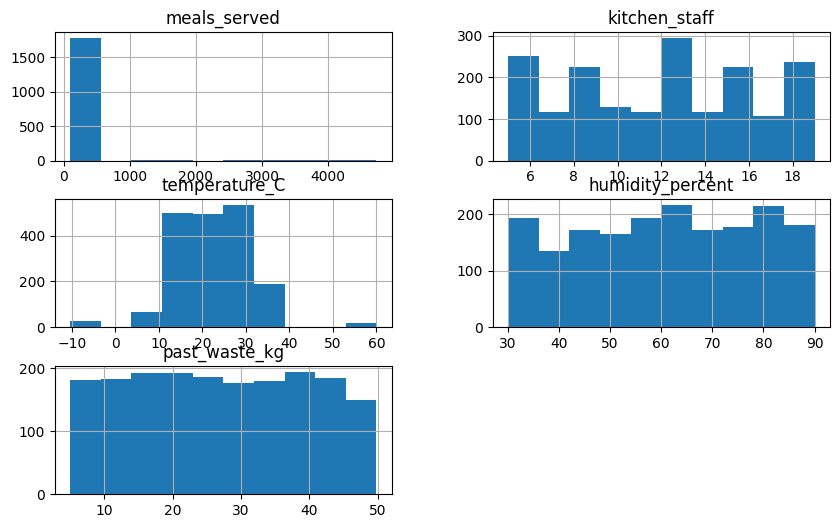

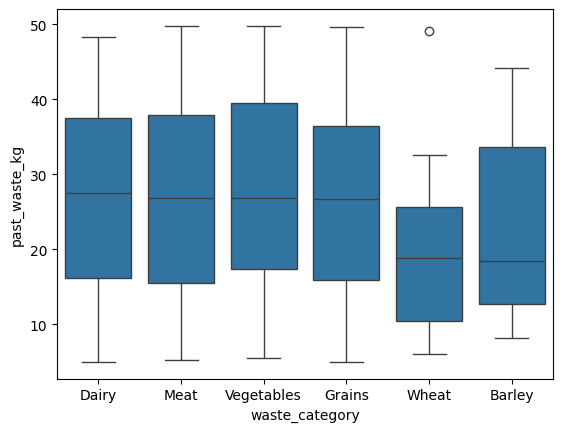

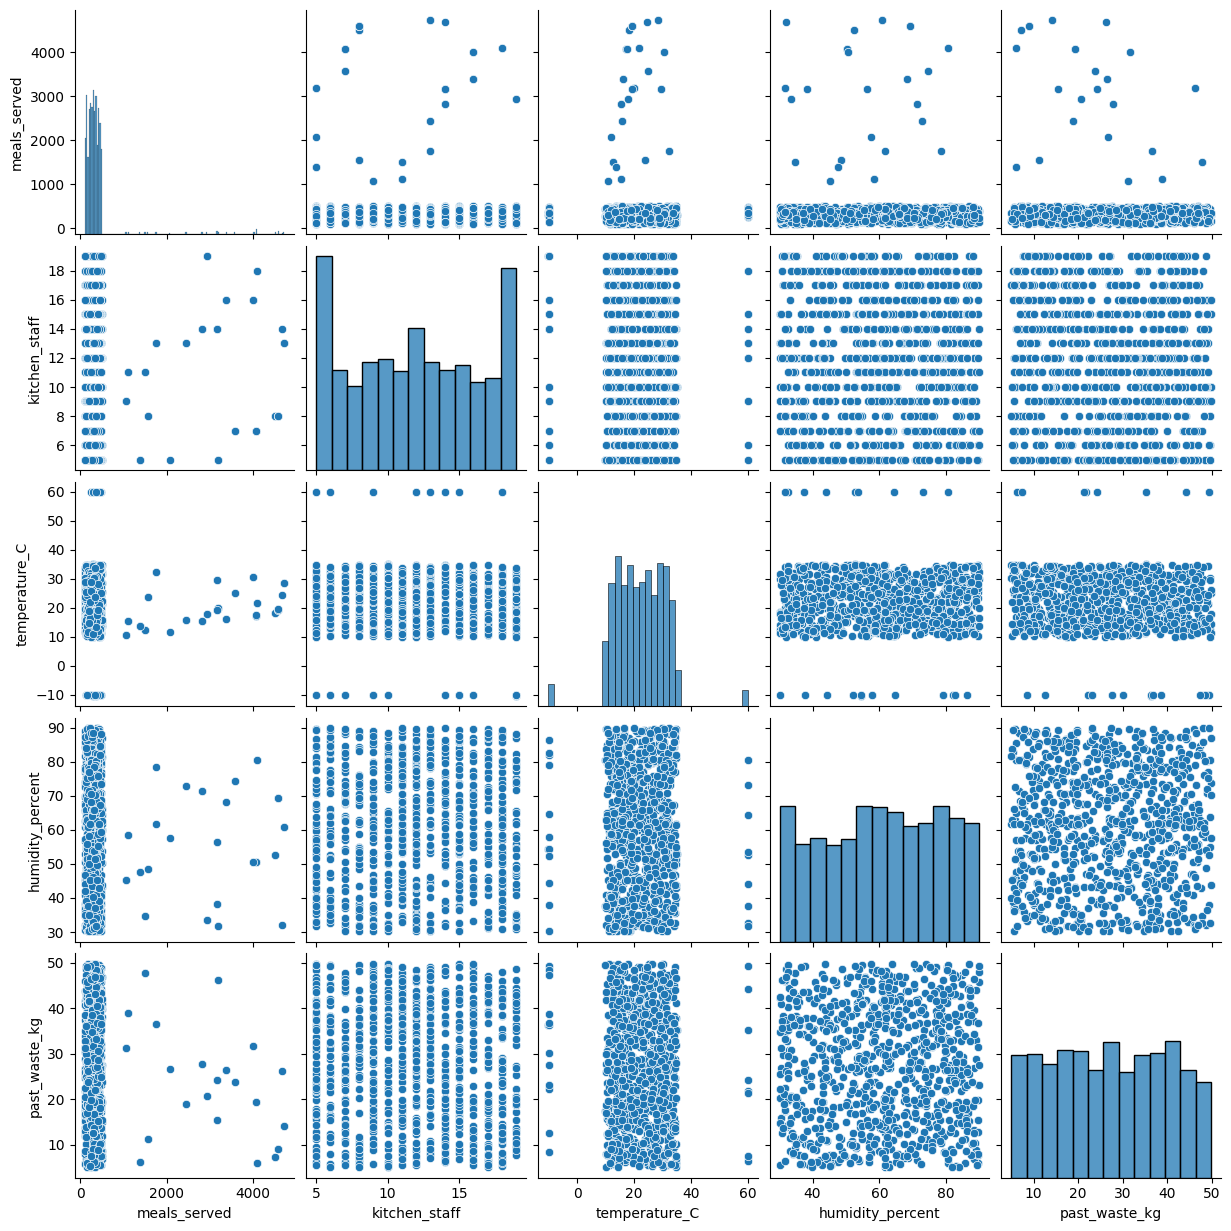

In [41]:
# Histogram for numerical columns
df[['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']].hist(figsize=(10, 6))
plt.show()

# Boxplot to check outliers
sns.boxplot(x='waste_category', y='past_waste_kg', data=df)
plt.show()

# Pair plot to check relationships between variables
sns.pairplot(df[['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']])
plt.show()

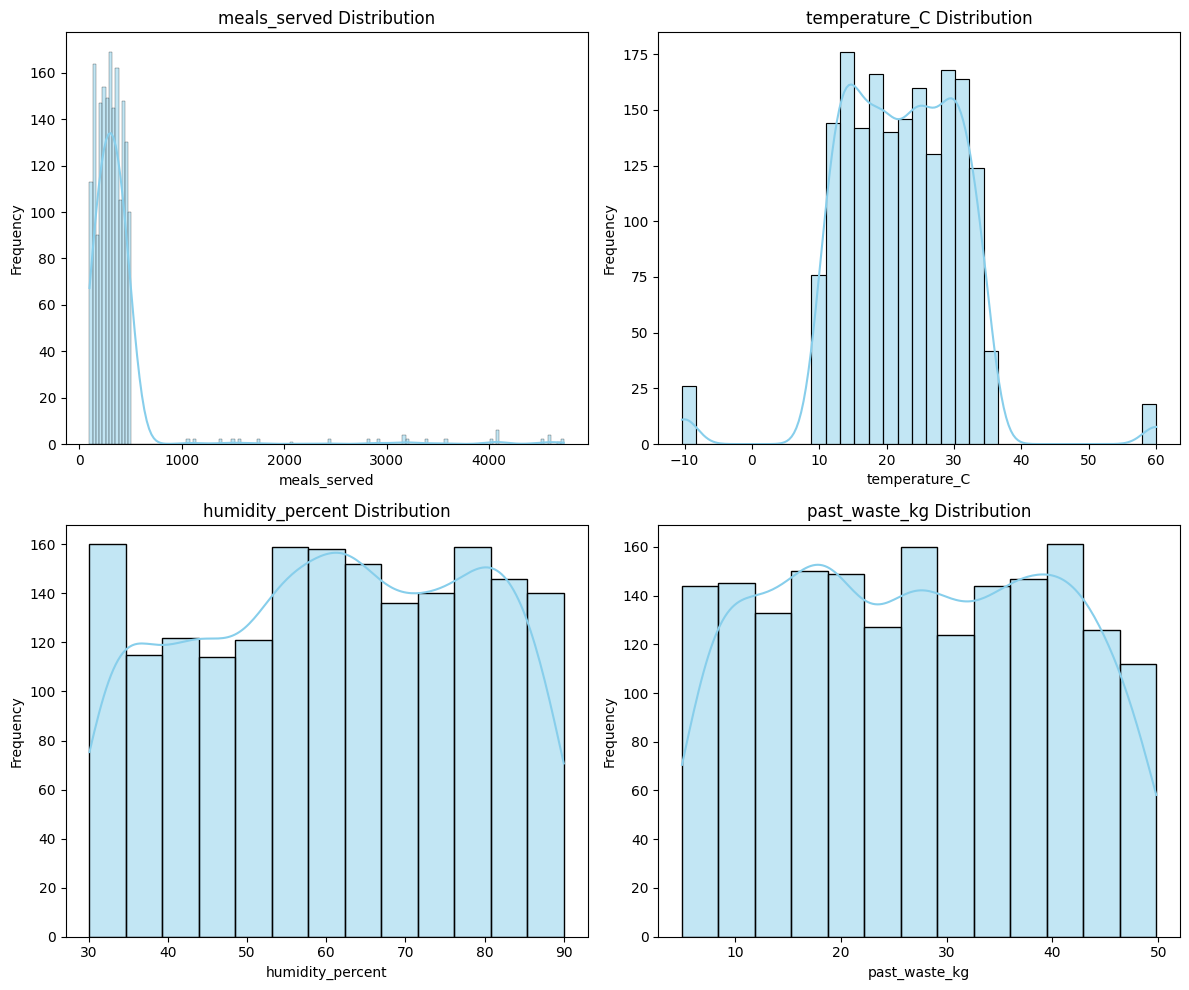

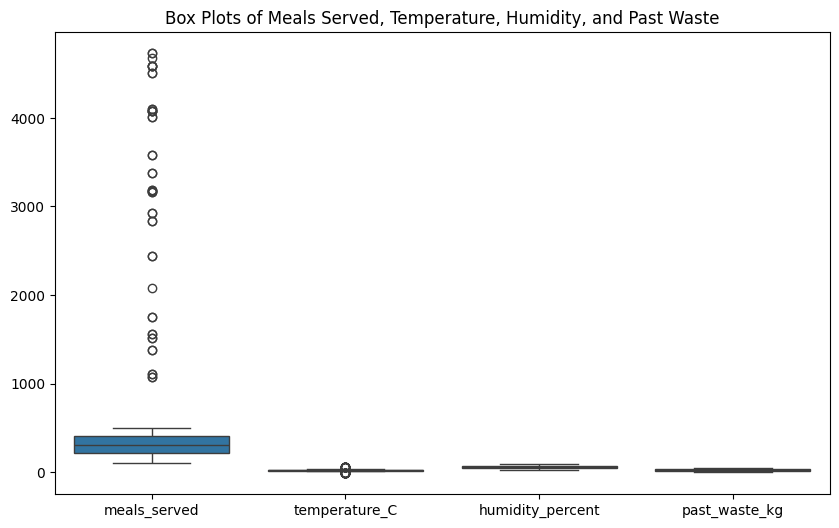

In [52]:
# List of columns to visualize
columns_to_plot = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']

# Set up the plot layout (2 rows and 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Loop over each column for histogram and box plot
for i, col in enumerate(columns_to_plot):
    # Positioning each subplot in the grid (2x2 layout)
    ax = axes[i//2, i%2]

    # Plotting Histogram
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

# Box plots for better understanding of outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns_to_plot])
plt.title('Box Plots of Meals Served, Temperature, Humidity, and Past Waste')
plt.show()

General Analysis shows:

---- HISTOGRAMS ----
1. meals_served: The distribution is heavily skewed to the right, with most observations having a relatively low number of meals served (below 500). There are some days with a much higher number of meals served, extending up to around 4500. This suggests that on most days, the **service is at a lower capacity**, with **occasional very busy days**.

2. kitchen_staff: The distribution appears somewhat uniform or **multimodal**, with peaks around staff counts of 6, 12, and 16-18. This indicates typical staffing levels used in the food service.

3. temperature_c: The humidity seems to be somewhat uniformly distributed between roughly **30% and 90%**, suggesting a wide range of humidity conditions in the dataset.

4. past_waste_kg: The distribution of past waste is somewhat uniform, ranging from close to 0 kg up to around 50 kg, with a slight peak in the lower ranges (around 10-20 kg).

---- BOX PLOTS ----

1. There's a noticeable difference in the median and distribution of past_waste_kg across the different waste_category.
2. **Wheat** appears to have the **lowest** median and generally lower waste compared to other categories. It also seems to have an outlier with higher waste.
3. **Vegetables and Dairy** tend to have **higher** median waste compared to Wheat.
4. **Meat, Grains, and Barley** show **intermediate levels** of waste.
5. The spread (interquartile range) of waste also varies across categories, suggesting different levels of consistency in waste generation for each food type.

---- BOX PLOTS ----

1. There doesn't appear to be a strong linear correlation between meals_served and kitchen_staff, temperature_C, humidity_percent, or past_waste_kg based on the scatter plots. However, we might see some non-linear relationships or patterns upon closer inspection.
2. Similar to meals_served, there isn't a very clear linear correlation with the other numerical variables. The scatter plots look somewhat scattered.
3. There doesn't seem to be a strong linear relationship between temperature and humidity.
4. The scatter plots of past_waste_kg against the other numerical variables don't immediately reveal strong linear correlations.

                        ID  meals_served  kitchen_staff  temperature_C  \
ID                1.000000     -0.007331      -0.015213       0.023922   
meals_served     -0.007331      1.000000      -0.028567      -0.019355   
kitchen_staff    -0.015213     -0.028567       1.000000      -0.022092   
temperature_C     0.023922     -0.019355      -0.022092       1.000000   
humidity_percent  0.003274     -0.035180      -0.014555      -0.012047   
day_of_week       0.014446      0.016864       0.034145       0.021189   
special_event     0.002737      0.001556       0.001319      -0.006800   
past_waste_kg     0.018890     -0.064149      -0.082783      -0.021394   

                  humidity_percent  day_of_week  special_event  past_waste_kg  
ID                        0.003274     0.014446       0.002737       0.018890  
meals_served             -0.035180     0.016864       0.001556      -0.064149  
kitchen_staff            -0.014555     0.034145       0.001319      -0.082783  
temperature_C

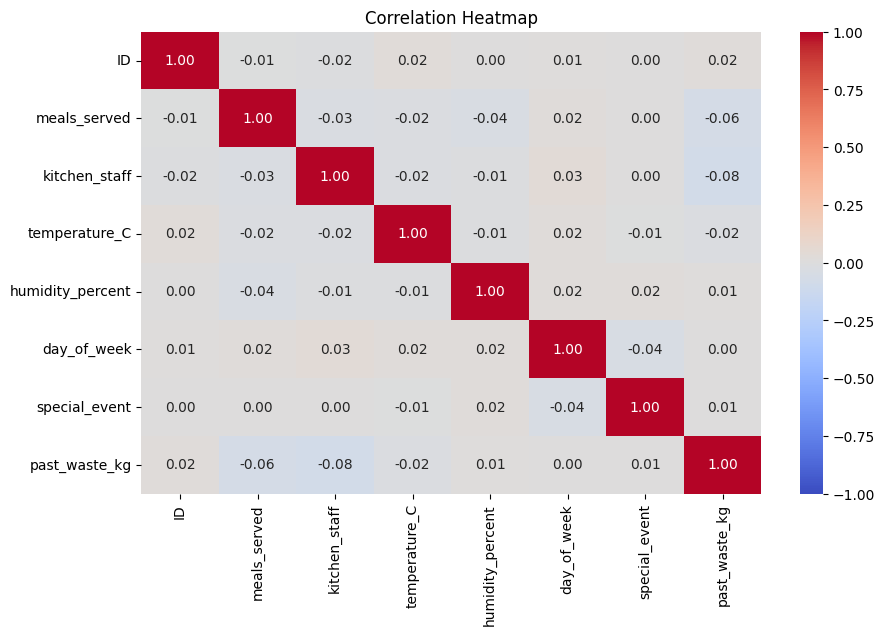

In [44]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Weak linear correlations between most numerical variables, including past_waste_kg and operational/environmental factors. This suggests that simple linear relationships might not be the primary drivers of waste.

In [45]:
from scipy.stats import ttest_ind

# Split data based on special event
event_data = df[df['special_event'] == 1]
no_event_data = df[df['special_event'] == 0]

# Perform t-test on past_waste_kg
t_stat, p_value = ttest_ind(event_data['past_waste_kg'], no_event_data['past_waste_kg'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.2813491411134061, P-value: 0.7784746055950134


Correlation between kitchen staff and food waste: -0.08278291627477079, P-value: 0.0004043513186396915


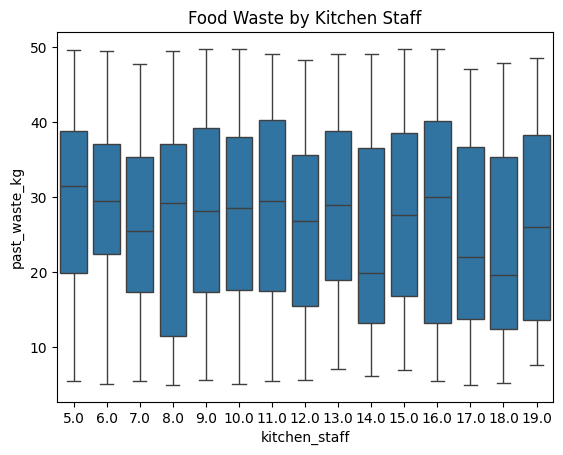

In [49]:
from scipy.stats import pearsonr
# Correlation between kitchen staff and food waste
correlation, p_value = pearsonr(df['kitchen_staff'], df['past_waste_kg'])
print(f"Correlation between kitchen staff and food waste: {correlation}, P-value: {p_value}")

# Boxplot to visualize waste distribution by kitchen staff numbers
sns.boxplot(x='kitchen_staff', y='past_waste_kg', data=df)
plt.title("Food Waste by Kitchen Staff")
plt.show()


The median past_waste_kg appears relatively consistent across different numbers of kitchen_staff. The spread (indicated by the box height and whiskers) also doesn't show a clear trend with the number of staff. This suggests that the number of kitchen staff alone might not be a strong predictor of food waste.

Correlation between temperature and food waste: -0.021393806134581046, P-value: 0.3614160997043177
Correlation between humidity and food waste: 0.014847662422023164, P-value: 0.5264915056776749


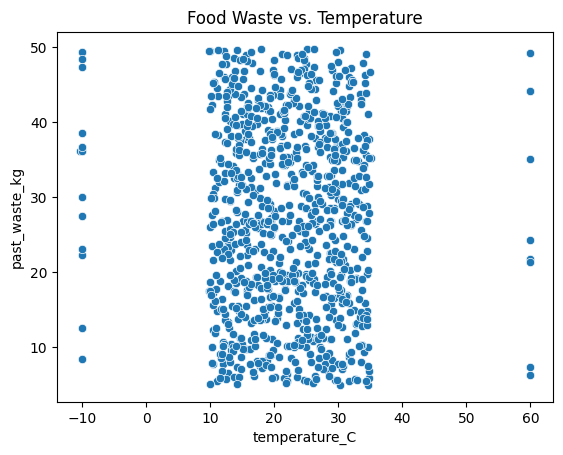

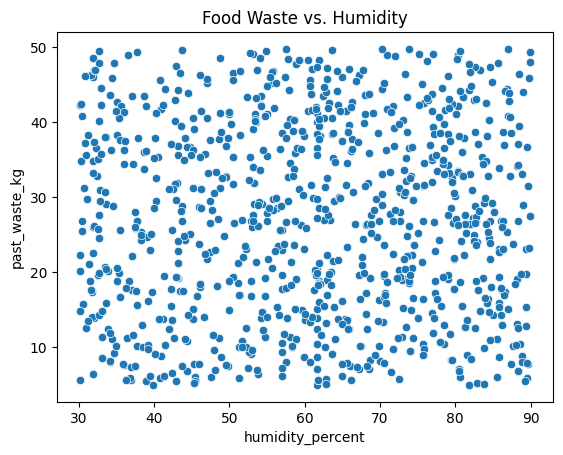

In [50]:
# Correlation between temperature and food waste
correlation_temp, p_value_temp = pearsonr(df['temperature_C'], df['past_waste_kg'])
print(f"Correlation between temperature and food waste: {correlation_temp}, P-value: {p_value_temp}")

# Correlation between humidity and food waste
correlation_humidity, p_value_humidity = pearsonr(df['humidity_percent'], df['past_waste_kg'])
print(f"Correlation between humidity and food waste: {correlation_humidity}, P-value: {p_value_humidity}")

# Scatter plot to visualize food waste by temperature and humidity
sns.scatterplot(x='temperature_C', y='past_waste_kg', data=df)
plt.title("Food Waste vs. Temperature")
plt.show()

sns.scatterplot(x='humidity_percent', y='past_waste_kg', data=df)
plt.title("Food Waste vs. Humidity")
plt.show()


The scatter plot shows no discernible linear or clear non-linear relationship between humidity_percent and past_waste_kg. The points are scattered widely.

special_event
0    26.970392
1    27.270480
Name: past_waste_kg, dtype: float64


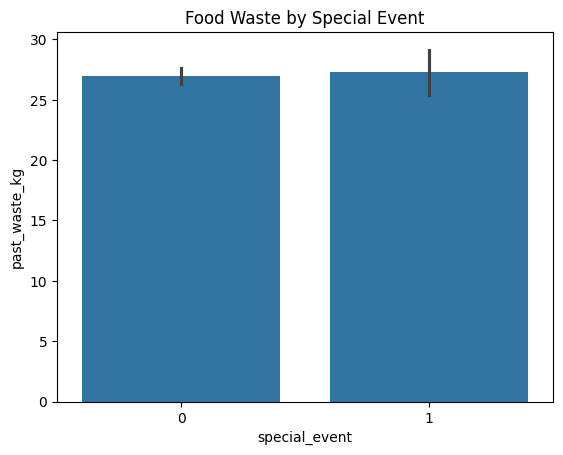

In [51]:
# Group by special event and calculate average waste
event_waste_avg = df.groupby('special_event')['past_waste_kg'].mean()
print(event_waste_avg)

# Visualize the waste by special event
sns.barplot(x='special_event', y='past_waste_kg', data=df)
plt.title("Food Waste by Special Event")
plt.show()


The average past_waste_kg is slightly higher on days with a special event (special_event = 1) compared to days without (special_event = 0), although the error bars (indicating variability) overlap. This suggests a possible, but not drastically significant, increase in waste during special events.

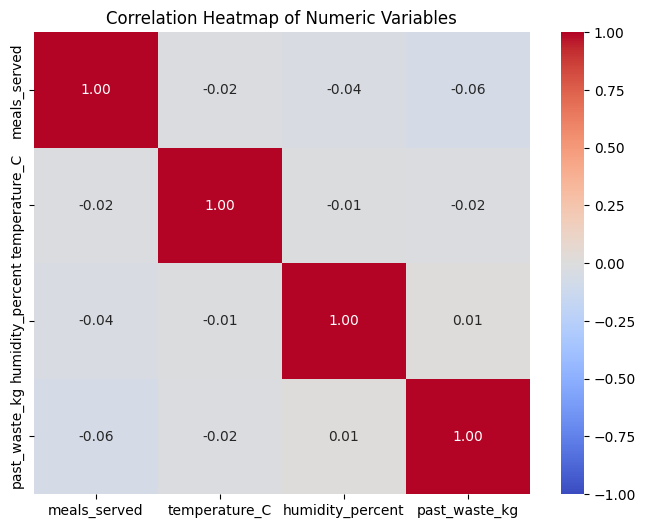

In [53]:
# Calculate correlation matrix
correlation_matrix = df[['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


<ipython-input-54-9a299a145ae4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waste_category', y='past_waste_kg', data=df, palette='viridis')


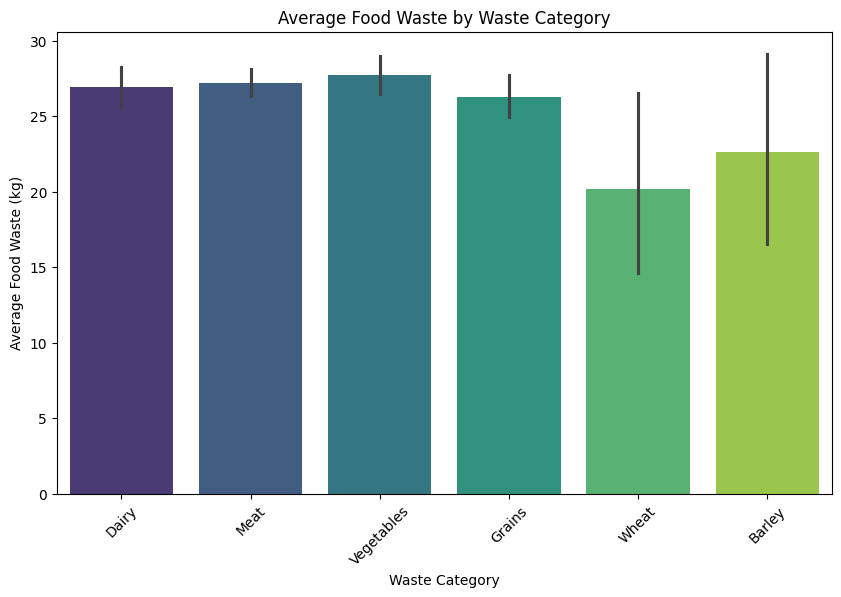

<ipython-input-54-9a299a145ae4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='staff_experience', y='past_waste_kg', data=df, palette='coolwarm')


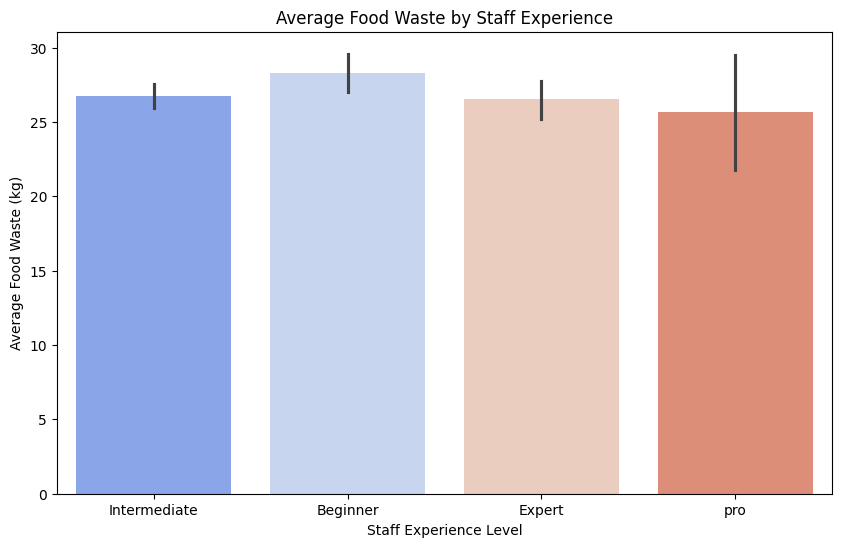

In [54]:
# Bar plot for food waste by waste category
plt.figure(figsize=(10, 6))
sns.barplot(x='waste_category', y='past_waste_kg', data=df, palette='viridis')
plt.title('Average Food Waste by Waste Category')
plt.xlabel('Waste Category')
plt.ylabel('Average Food Waste (kg)')
plt.xticks(rotation=45)
plt.show()

# Bar plot for food waste by staff experience level
plt.figure(figsize=(10, 6))
sns.barplot(x='staff_experience', y='past_waste_kg', data=df, palette='coolwarm')
plt.title('Average Food Waste by Staff Experience')
plt.xlabel('Staff Experience Level')
plt.ylabel('Average Food Waste (kg)')
plt.show()


The average past_waste_kg appears somewhat similar across different levels of staff_experience (Intermediate, Beginner, Expert, Pro), with overlapping error bars. This suggests that staff experience level, as categorized here, might not have a strong direct impact on the amount of food waste.

In [55]:
# Specify the file name for the saved CSV
file_name = 'processed_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_name, index=False)  # index=False ensures the index is not saved as a column

# Confirm that the file has been saved
print(f"Data has been saved to {file_name}")


Data has been saved to processed_data.csv
